<a href="https://colab.research.google.com/github/sharmaiiitb/melanoma-detection-NN/blob/main/Pankaj_Kumar_Sharma_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Important Libraries**

In [8]:
!pip install keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout

**Step 1: Importing Data**

**Dataset Having `2357 images` (2239 on Train Dataset and 118 of Test Dataset)of `skin cancer` types. Dataset contains `9 sub-directories` in each train and test subdirectories. All 9 sub-directories contains images of 9 skin cancer types Images respectively.**

In [9]:
# Defining path for train and test images
#data_dir_path = "/content/gdrive/MyDrive/Dataset"
data_dir_path = "/content/drive/MyDrive/datasetss"
data_dir_train = pathlib.Path(data_dir_path + '/Train')
data_dir_test = pathlib.Path(data_dir_path + '/Test')

#print(data_dir_train)

In [10]:
# Counting number of images in Train and Test directory Using the glob to retrieve files/pathnames matching a specified pattern.

# displaying Train Image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Image count in Train Dataset: ", image_count_train)

# Displaying Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Image count in Test Dataset: ",image_count_test)

Image count in Train Dataset:  2239
Image count in Test Dataset:  118


 **Dataset uses about 2239 images of Skin Cancer Type for Train Dataset and 118 Images for Test Dataset**
 - we can't use these directly for model Building, converted it into dataset

**Dataset Creation and defining Parameter**

In [11]:
# consider Batch Size 32 and height and width as 180.
batch_size = 32
img_height = 180
img_width = 180

### load images using keras.utils
Let's load these images off disk using the image_dataset_from_directory.
**Using 80 % of the images for Trainning and rest 20 % images for Validation**


In [12]:
# defining Train Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset="training",
)
#  **kwargs  showing error


Found 4630 files belonging to 9 classes.
Using 3704 files for training.


In [13]:
# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset="validation",
)
#  **kwargs  showing error


Found 4630 files belonging to 9 classes.
Using 926 files for validation.


In [14]:
# Listing out all the classes of skin cancer.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Visualizing the data**
- visualizing one instance of all classes present in dataset.

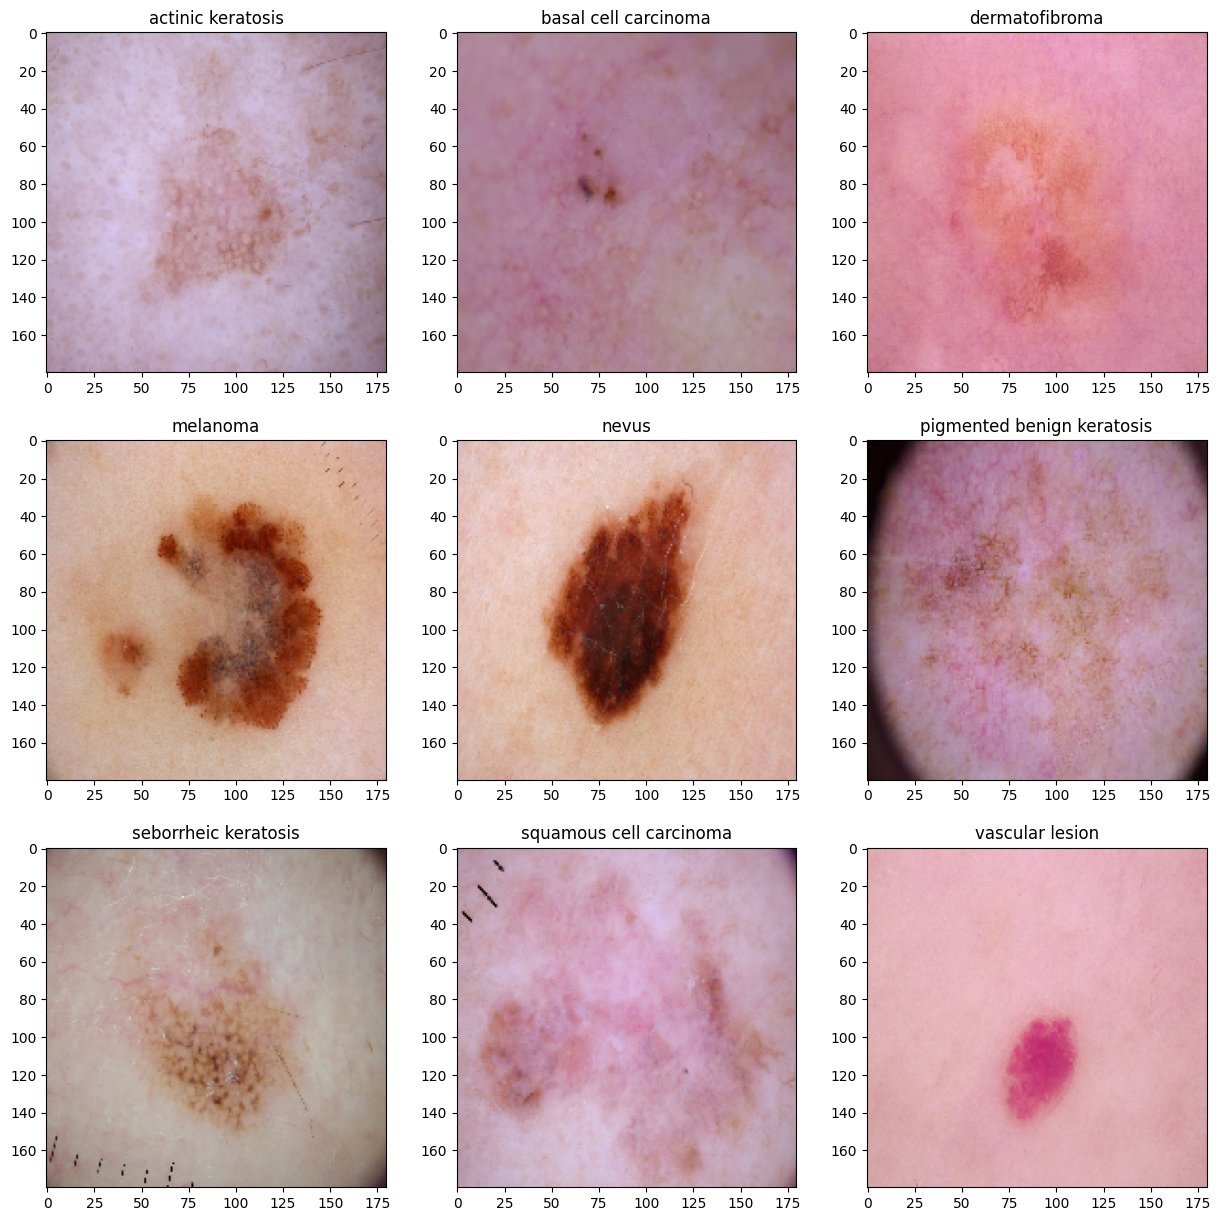

In [15]:
# importing library
from tensorflow.keras.preprocessing.image import load_img

# Dictionary to store the path of image as per the their class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

# Visualize image

plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

The `image_batch` is a tensor of shape `(32,180,180,3)` its a batch of 32


images of shape `(180 * 180 * 3 )` # here last dimension 3 indicating color channel RGB.
`Label batch` is Tensor of shape 32.

- `Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

- `Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Step : Model Creation**

creating CNN model framework using Keras CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

**Model M1**

In [17]:

input_shape = (img_height, img_width, 3)
num_classes = 9

# Use the batch normalization and drop out to cehck the model

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),

# First Convulation Layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

# Second Convulation Layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

# Third Convulation Layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

# Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
  layers.Flatten(),

# Dense Layer
  layers.Dense(128, activation='relu'),


# model..dense
  layers.Dense(num_classes)
])


**Compiling the model using optimiser and loss function**

In [18]:
# using appropirate optimiser and loss function for compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])  # from_logits=True removed due to error

In [19]:
# Showing the summary of all the layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

**Model Training**

In [20]:
#epochs = 20
epochs = 3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
116/116 [==============================] - 179s 1s/step - loss: 1.6778 - accuracy: 0.3758 - val_loss: 1.5179 - val_accuracy: 0.4730
Epoch 2/3
116/116 [==============================] - 132s 1s/step - loss: 1.3674 - accuracy: 0.5124 - val_loss: 1.3863 - val_accuracy: 0.4957
Epoch 3/3
116/116 [==============================] - 125s 1s/step - loss: 1.1751 - accuracy: 0.5926 - val_loss: 1.5572 - val_accuracy: 0.4892


**Visualizing the training results**

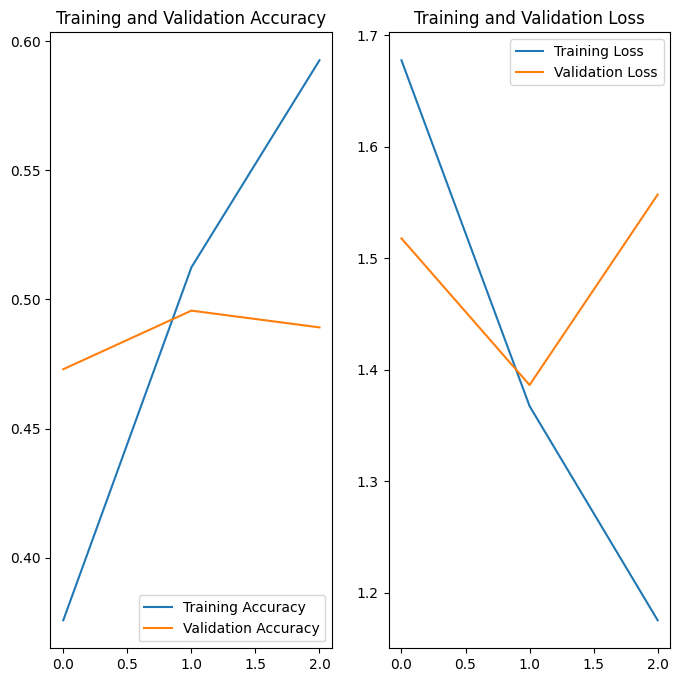

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Findings after the first model fit

 - we can't say its a good model its not generalized model.
 - Training dataset having some noise in data, showing good result for Training dataset as compared    to validation dataset.
 - Training datset showing accuracy around`88 %`and validation dataset showing around`53 % `accuracy.
 - from above conculusion we can conclude that model is `overfitting`
 - From above Graph Training and Validation accuracy graph we can see that as the epoch increases the difference between Training accuracy and validation accuracy increases. also the difference in Training and Validation Loss function increases.
 - to overcome from these issue, will try for better model

**Data Augmentation layer strategy**

In [22]:
# Data augumentation strategy.
# To rescale an input in the [0, 255] range to be in the [0, 1] range
# rescale = tf.keras.Sequential([ layers.experimental.preprocessing.Rescaling(1./255)])
# random flip -  randomly flip every image horizontally and vertically.

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",
                                                input_shape = (img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.3)
])

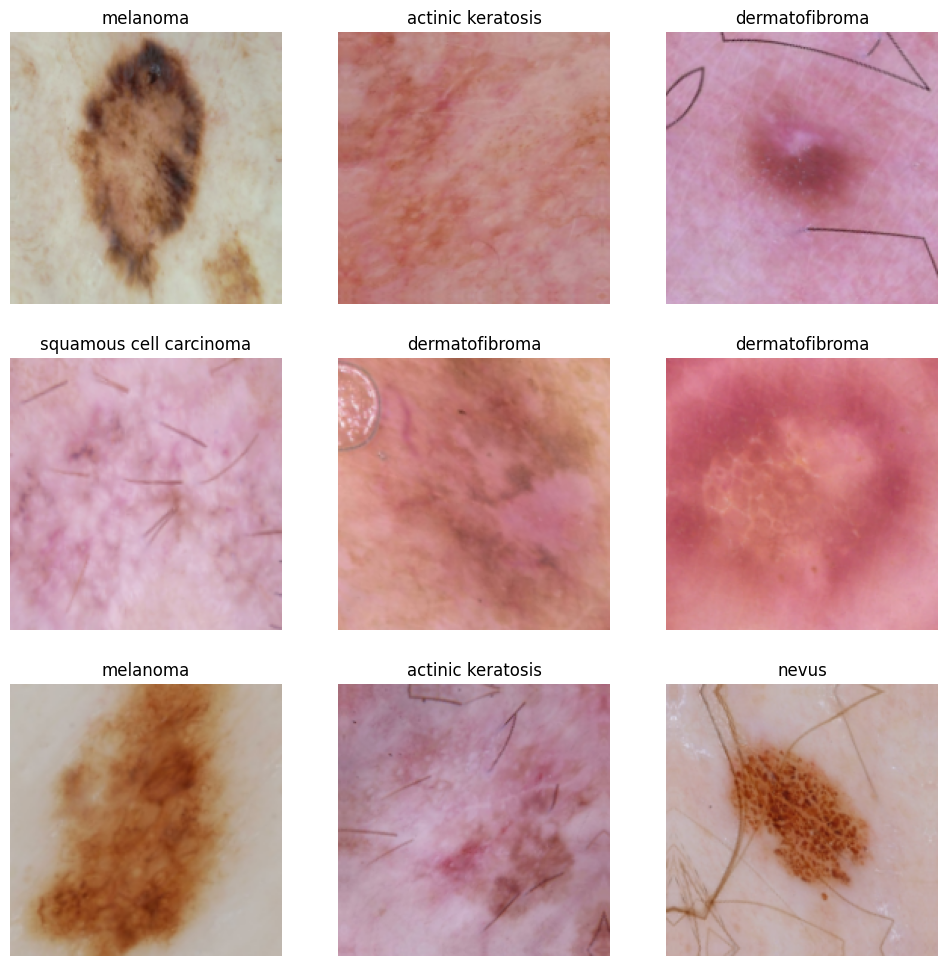

In [23]:
# Visualizing the augmentation images

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Create the model, compiling and training the model.**

### as there is overfitting in model m1 here using dropout


**Model : 2 Creation**

In [24]:
input_shape = (img_height, img_width, 3)
num_classes = 9

# Use the batch normalization and drop out to cehck the model

model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),

# First Convulation Layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.3),

# Second Convulation Layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

# Third Convulation Layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

# Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
  layers.Flatten(),
# Dropout Layer
  layers.Dropout(.25),
# Dense Layer
  layers.Dense(128, activation='relu'),


# model.add(Dense(num_classes, activation='softmax'))
  layers.Dense(num_classes)
])

In [25]:

# using appropirate optimiser and loss function for compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])  # from_logits=True removed due to error

In [26]:
# Showing the summary of all the layers
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

In [27]:
#epochs = 20
epochs = 3
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3
116/116 [==============================] - 161s 1s/step - loss: 1.9870 - accuracy: 0.2773 - val_loss: 1.7206 - val_accuracy: 0.3261
Epoch 2/3
116/116 [==============================] - 162s 1s/step - loss: 1.6749 - accuracy: 0.3696 - val_loss: 1.6524 - val_accuracy: 0.3790
Epoch 3/3
116/116 [==============================] - 163s 1s/step - loss: 1.5538 - accuracy: 0.4150 - val_loss: 1.6434 - val_accuracy: 0.4190


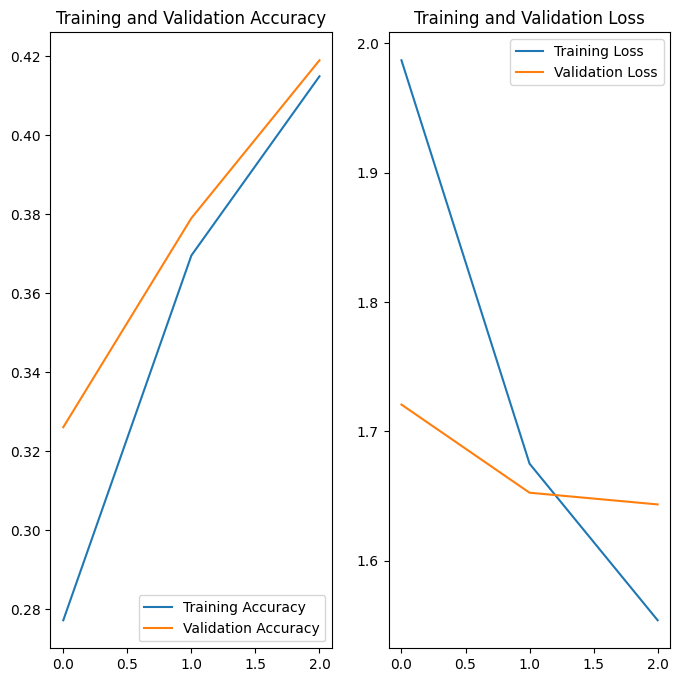

In [28]:
# Visualizing results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 **findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?**

**findings:**
 - from above graph we can clearly observe that the training accuracy and validation accuracy is close to each others. which indicates data augumentation and dropout layer helped to reduce overfitting issue.
 - but Model Performance is still not increased. trainig accuracy around 56 % and validation accuracy around 52 %.
 - training and validation are closed to each others Means model is `Underfitting`. we need to overcome from this issue.


**Class Imbalance Detection**
Find the distribution of classes in the training dataset.
Check if there is any class imbalance.

#### Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [29]:
def class_img_count(directory):

    # counting number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    # listing name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    # return dataframe with images counting and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class Name', 'No. of Image Count'])

img_count = class_img_count(data_dir_train)
img_count

,Class Name,No. of Image Count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


**Graphical representation of number of images in each class**

<ipython-input-30-e53522f8e3aa>:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x='Class Name', y='No. of Image Count', data=img_count, errwidth=0)


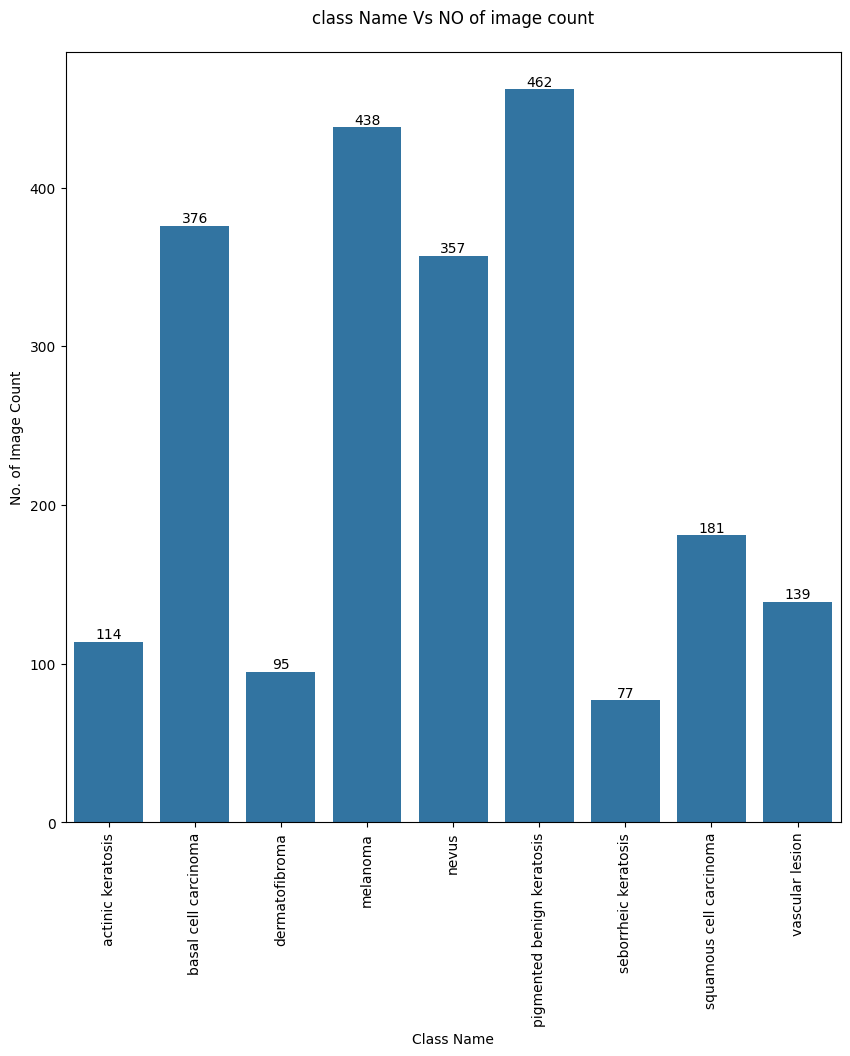

In [30]:
# Import Seborn library for visualisation
import seaborn as sns

plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Class Name', y='No. of Image Count', data=img_count, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('class Name Vs NO of image count\n')
plt.xticks(rotation=90)
plt.show()

### Which class has the least number of samples?

**findings:-**
 From above results seborrheic keratosis has the least number of samples only 77 (about 3.4 %)

### Which classes dominate the data in terms proportionate number of samples?

**findings:-**
Top most dominating classes in datset are
   
   - pigmented benign keratosis 462 Samples (about 20.6 %)
   - melanoma 438 Samples (about 19.5 %)
   - basal cell carcinoma 376 Samples (about 16.7 %)
   - nevus 357 Samples (about 15.9 %)

 classes dominates the data in terms proportionate number of samples .

Rectifying the class imbalance

Use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
# installing Augmentor using pip command
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your `Pipeline` object.
Execute these operations by calling the `Pipeline’s` `sample()` method.

# Augmentor Library layer code

In [32]:
path_to_training_dataset = str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability = 0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B3ED0D3AB00>: 100%|██████████| 500/500 [00:29<00:00, 17.09 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B3ED0D6FE20>: 100%|██████████| 500/500 [00:35<00:00, 14.21 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B3ED2698700>: 100%|██████████| 500/500 [00:26<00:00, 18.91 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B3ED0D072E0>: 100%|██████████| 500/500 [01:47<00:00,  4.64 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7B3EDB5735E0>: 100%|██████████| 500/500 [01:29<00:00,  5.57 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B3F7D05F3D0>: 100%|██████████| 500/500 [00:24<00:00, 20.49 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B3EF01765F0>: 100%|██████████| 500/500 [00:47<00:00, 10.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B3ED2633D30>: 100%|██████████| 500/500 [00:23<00:00, 21.67 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/datasetss/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B3ED0CEC5E0>: 100%|██████████| 500/500 [00:23<00:00, 21.10 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.

### counting number of images generated by Augmentor.

In [33]:
# Counting number of images generated by Augmentor.

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6891


### Lets see the distribution of augmented data after adding new images to the original training data

In [34]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/datasetss/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026984.jpg_e9ab7dcc-c345-43bb-83d5-688f42bd7622.jpg',
 '/content/drive/MyDrive/datasetss/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030143.jpg_e6c14c1e-8279-490f-9c1f-afe9273444a7.jpg',
 '/content/drive/MyDrive/datasetss/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026149.jpg_2b100ae8-6c5d-4bc9-ac6d-04e883a052dd.jpg',
 '/content/drive/MyDrive/datasetss/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032206.jpg_c8138734-b6f5-4838-ae4b-fe349c1f7d7d.jpg',
 '/content/drive/MyDrive/datasetss/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032437.jpg_efaa3dd3-91a0-40bd-8a38-a825ed840c8e.jpg',
 '/content/drive/MyDrive/datasetss/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028517.jpg_132676f7-ef62-402a-84a9-b9ceb9a7e48a.jpg',
 '/content/drive/MyDrive/datasetss/Train/actinic keratosis/output/actinic keratosi

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [36]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [37]:
# dataframe that store path and label of the images generated by Augmentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [38]:
# label count.
df2['Label'].value_counts()

actinic keratosis             1000
basal cell carcinoma          1000
dermatofibroma                1000
melanoma                      1000
nevus                          891
pigmented benign keratosis     500
seborrheic keratosis           500
squamous cell carcinoma        500
vascular lesion                500
Name: Label, dtype: int64

- So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

### Creating Training dataset

In [40]:
# Training dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,                    # to overcome from randomness
  validation_split = 0.2,      # 20 % of data reserve for validation
  subset = 'training',          # subset for training set
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9130 files belonging to 9 classes.
Using 7304 files for training.


## Creating validation dataset

In [41]:
# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,                    # to overcome from randomness
  validation_split = 0.2,      # 20 % of data reserve for validation
  subset = 'validation',          # subset for training set
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9130 files belonging to 9 classes.
Using 1826 files for validation.


**creating a model including normalization**
# Model : 3

In [42]:
input_shape = (img_height, img_width, 3)
num_classes = 9

# Use the batch normalization and drop out to cehck the model

model3 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),

# First Convulation Layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.3),

# Second Convulation Layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.3),
# Third Convulation Layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

# Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
  layers.Flatten(),
# Dropout Layer
  layers.Dropout(.25),
# Dense Layer
  layers.Dense(128, activation='relu'),


# model.add(Dense(num_classes, activation='softmax'))
  layers.Dense(num_classes)
])

Compiling model using (Adam optimizer and categorical_crossentropy loss function)

In [43]:
# using appropirate optimiser and loss function for compile the model
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model3.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])  # from_logits=True removed due to error

In [44]:
# Showing the summary of all the layers
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

In [45]:
#epochs = 30
epochs = 3
history = model3.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/3
229/229 [==============================] - 367s 2s/step - loss: 2.3164 - accuracy: 0.1570 - val_loss: 2.1669 - val_accuracy: 0.1742
Epoch 2/3
229/229 [==============================] - 375s 2s/step - loss: 1.8479 - accuracy: 0.3024 - val_loss: 1.7617 - val_accuracy: 0.3390
Epoch 3/3
229/229 [==============================] - 364s 2s/step - loss: 1.6017 - accuracy: 0.3969 - val_loss: 1.5863 - val_accuracy: 0.4381


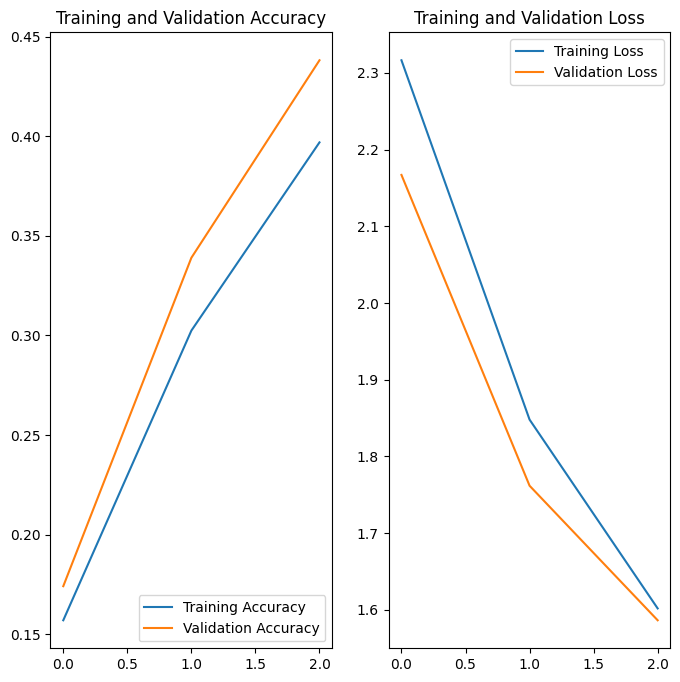

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### findings
- if we analyse accuracy of model 3 is less but difference in validation and trainning is also less which is good for model 3
- Trying to remove augmentation layer from model and checking performance

In [47]:
input_shape = (img_height, img_width, 3)
num_classes = 9

# Use the batch normalization and drop out to cehck the model

model4 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),

# First Convulation Layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.3),

# Second Convulation Layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(.3),
# Third Convulation Layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

# Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
  layers.Flatten(),
# Dropout Layer
  layers.Dropout(.25),
# Dense Layer
  layers.Dense(128, activation='relu'),


# model.add(Dense(num_classes, activation='softmax'))
  layers.Dense(num_classes)
])

In [48]:
# using appropirate optimiser and loss function for compile the model
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model4.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])  # from_logits=True removed due to error

In [49]:
# Showing the summary of all the layers
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [50]:
#epochs = 30
epochs = 3
history = model4.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/3
229/229 [==============================] - 341s 1s/step - loss: 2.1859 - accuracy: 0.1774 - val_loss: 1.9017 - val_accuracy: 0.2919
Epoch 2/3
229/229 [==============================] - 334s 1s/step - loss: 1.7020 - accuracy: 0.3647 - val_loss: 1.5904 - val_accuracy: 0.4168
Epoch 3/3
229/229 [==============================] - 336s 1s/step - loss: 1.4114 - accuracy: 0.4818 - val_loss: 1.3698 - val_accuracy: 0.5181


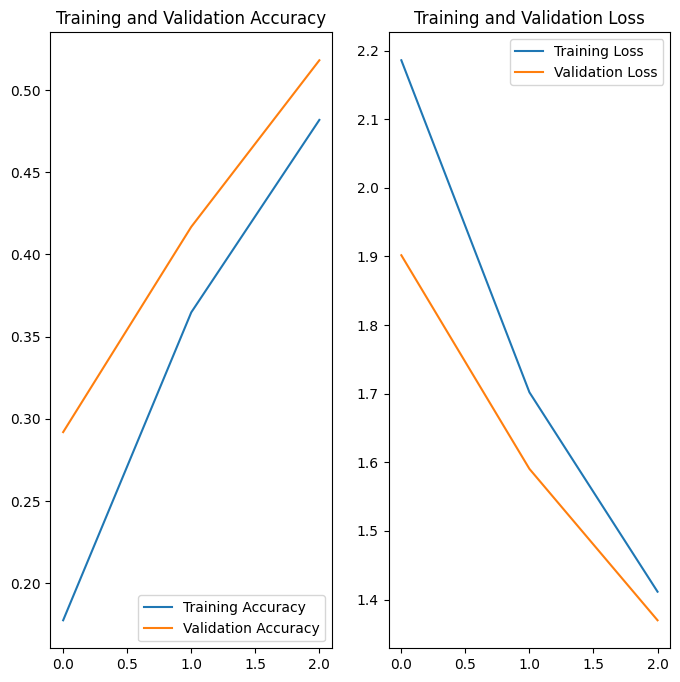

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### removal of augumentation layer considerably improved the accoracy of model

### Analysis of results
  - After adding 500 images of each category, we can clearly see the results have been improved in both training and validation dataset.
  - also, overfitting and underfitting issue have been resolved in the final model.
  - Adding the images helped in resolving the class imbalance issue for both training and validation    dataset.
  - We can also observe that the results are satisfactory now. Accuracy came around 88% for training    and 79 % for validation.